In [163]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)

import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.integrate import quad
import random,glob,math

PI = 3.1415926535
E = 2.71828

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [83]:
def integrate(func, a, b, **kwargs):
    def real_func(x):
        return scipy.real(func(x))
    def imag_func(x):
        return scipy.imag(func(x))
    real_integral = quad(real_func, a, b, **kwargs)
    imag_integral = quad(imag_func, a, b, **kwargs)
    return (real_integral[0] + 1j*imag_integral[0], real_integral[1:], imag_integral[1:])

In [20]:
capDataFiles = [open(i) for i in sorted(glob.glob("March22/air*cap.csv"))]
conDataFiles = [open(i) for i in sorted(glob.glob("March22/air*con.csv"))]

capData = [[float(i) for i in j.readline().split(',')] for j in capDataFiles]

m = [len(i) for i in capData]
X = [range(len(i)) for i in capData]
Y = capData

In [21]:
step = lambda x: 0.0 if x < 0 else 1.0 if x > 0 else 0.5

In [55]:
T = [X[i][m[i]-1]-X[i][0] for i in range(len(X))]
w = [(2*PI)/i for i in T]

In [146]:
f = lambda x: sum([ (((Y[j]-Y[j-1])/(X[j]-X[j-1]))*(x-X[j]) + Y[j])*step(-(x-X[j])*(x-X[j-1])) for j in range(1,m)])
c = lambda n: (1/T)*integrate(lambda x: f(x)*(E**(-1j*n*w*x)), X[0], X[0]+T)[0]

order = 3
#Lists where each index represents a list of the same order coefficients
coef_r = [[] for i in range(order)]
coef_i = [[] for i in range(order)]
mean_r = [0 for i in range(order)]
mean_i = [0 for i in range(order)]
sig_r = [0 for i in range(order)]
sig_i = [0 for i in range(order)]
gauss_r = [0 for i in range(order)]
gauss_i = [0 for i in range(order)]

for i in range(len(T)):
    c_ = lambda n: -(1/(1j*n*w[i]*T[i]))*sum([
        ((Y[i][j]-Y[i][j-1])/(X[i][j]-X[i][j-1]))*(X[i][j]*(E**(-1j*n*w[i]*X[i][j])) - X[i][j-1]*(E**(-1j*n*w[i]*X[i][j-1]))) + \
        (E**(-1j*n*w[i]*X[i][j]) - E**(-1j*n*w[i]*X[i][j-1]))*(Y[i][j]-((Y[i][j]-Y[i][j-1])/(X[i][j]-X[i][j-1]))*X[i][j]+(1/(1j*n*w[i]))*((Y[i][j]-Y[i][j-1])/(X[i][j]-X[i][j-1]))) \
        for j in range(1,m[i])])

    for k in range(order):
        cur = c_(k+1)
        coef_r[k].append(scipy.real(cur).tolist())
        coef_i[k].append(scipy.imag(cur).tolist())

for k in range(order):
    mean_r[k] = sum(coef_r[k])/len(coef_r[k])
    mean_i[k] = sum(coef_i[k])/len(coef_i[k])
    sig_r[k] = math.sqrt(sum([i**2 for i in coef_r[k]])/len(coef_r[k]) - (sum(coef_r[k])/len(coef_r[k]))**2)
    sig_i[k] = math.sqrt(sum([i**2 for i in coef_i[k]])/len(coef_i[k]) - (sum(coef_i[k])/len(coef_i[k]))**2)
    gauss_r[k] = lambda x: (1/(sig_r[k]*math.sqrt(2*PI)))*E*(-((x - mean_r[k])**2)/(2*(sig_r[k]**2)))

#sig_first_r = math.sqrt(sum([i**2 for i in first_r])/len(first_r) - (sum(first_r)/len(first_r))**2)
#sig_first_i = math.sqrt(sum([i**2 for i in first_i])/len(first_i) - (sum(first_i)/len(first_i))**2)
#gauss_first_r = lambda x: (1/(sig_first_r*math.sqrt(2*PI)))*E*(-((x - first_r[-1])**2)/(2*(sig_first_r**2)))

#print min(first_r[:-1]),max(first_r[:-1])
print gauss_r[0](mean_r[2])
print gauss_r[1](mean_r[2])
print gauss_r[2](mean_r[2])

-0.0
-0.0
-0.0


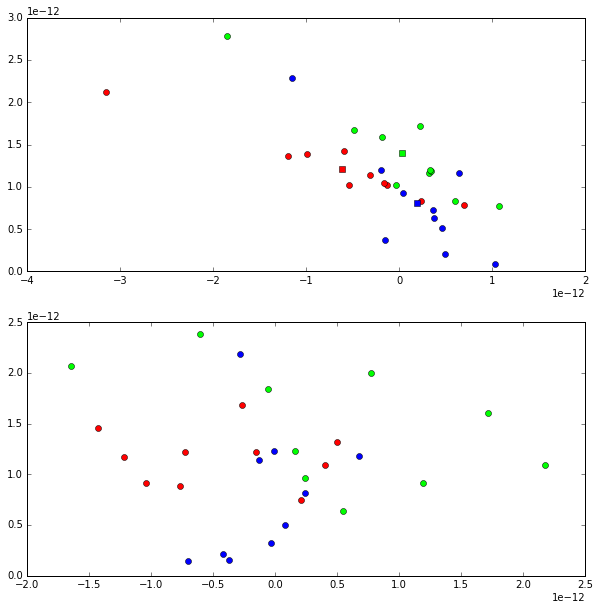

In [179]:
d = 10.0**13

plt.subplot(211)
colors = ['#ff0000','#00ff00','#0000ff']
for i in range(order):
    plt.plot(coef_r[i],coef_i[i],'ro',color=colors[i])
    plt.plot([mean_r[i]],[mean_i[i]],'rs',color=colors[i])

    #plt.plot([j/d for j in range(-40,20)],[gauss_r[k](j/d) for j in range(-40,20)],'r-',color=colors[i])

plt.subplot(212)
for i in range(order):
    plt.plot(np.random.normal(mean_r[i],sig_r[i],10),np.random.normal(mean_i[i],sig_i[i],10),'ro',color=colors[i])

plt.show()

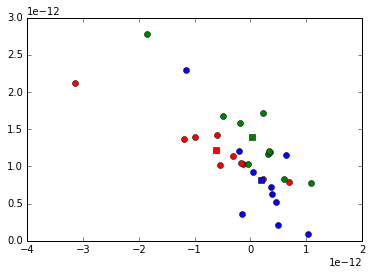

In [152]:
plt.plot(first_r[:-1],first_i[:-1],'ro')
plt.plot(first_r[-1:],first_i[-1:],'rs')
plt.plot(second_r[:-1],second_i[:-1],'go')
plt.plot(second_r[-1:],second_i[-1:],'gs')
plt.plot(third_r[:-1],third_i[:-1],'bo')
plt.plot(third_r[-1:],third_i[-1:],'bs')

d = 10.0**12
#plt.plot([i/d for i in range(-4,2)],[gauss_first_r(i/d) for i in range(-4,2)],'r-')

plt.show()

In [153]:
g = lambda x: sum([ c(n)*(E**(1j*n*w*x)) for n in range(-5,6)])
g_ = lambda x: sum([ c_(n)*(E**(1j*n*w*x)) for n in range(-30,0)]) + sum([ c_(n)*(E**(1j*n*w*x)) for n in range(1,31)])

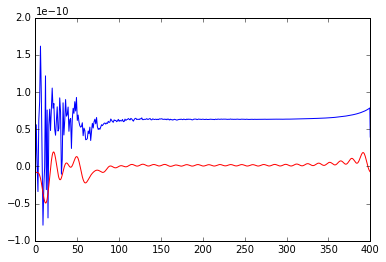

In [200]:
d = 2.0
domain = [i/d for i in range(int(X[m-1]*d)+1)]
plt.plot(domain,[f(i) for i in domain])
#plt.plot(domain,[g(i) for i in domain],'r-')
plt.plot(domain,[g_(i) for i in domain],'r-')
#plt.plot(domain,[sum([ step1(n)*(E**(1j*n*w*i)) for n in range(-5,6)]) for i in domain],'g-')
#plt.plot(domain,[sum([ step2(n)*(E**(1j*n*w*i)) for n in range(-5,6)]) for i in domain],'g-')
plt.show()